# Astrometric orbit of Algol AB

Figure 12.5 from Chapter 12 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University
Press.

Interferometric positions of Algol B relative to Algol A, determined with the CHARA interferometer. The 
best-fitting orbit is shown as the large ellipse, and smaller ellipses indicate the location of the center 
of Algol B at the times of the observations.  The angular diameter of Algol B is 1.1 mas.)

Data are from the CHARA interferometer, [Baron, F. et al. 2012 ApJ, 752, 20](https://ui.adsabs.harvard.edu/abs/2012ApJ...752...20B), Tables 3 and 6 create a version of their Figure 6.

In [11]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [12]:
plotFile = 'Fig12_5.png' 

# graphic aspect ratio = width/height

aspect = 1.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Ellipses and Circles

Convenience functions to plot rotated ellipses and circles.

In [13]:
'''
plotEllipse() - plot a rotated ellipse
'''

def plotEllipse(ax,xc,yc,major,minor,pa,ecolor,fcolor=None,ltype='-',alpha=1,lw=0.2):
    theta = np.linspace(0,2*np.pi,360,endpoint=True)
    sinPA = np.sin(np.radians(pa))
    cosPA = np.cos(np.radians(pa))
    x0 = major*np.cos(theta)
    y0 = minor*np.sin(theta)
    xs = xc + (x0*cosPA - y0*sinPA)
    ys = yc + (x0*sinPA + y0*cosPA)
    if fcolor is not None:
        ax.fill(xs,ys,color=fcolor,alpha=alpha,zorder=8)
    ax.plot(xs,ys,linestyle=ltype,color=ecolor,lw=lw,zorder=10)
    
'''
plotCircle() - plot a circle
'''

def plotCircle(ax,xc,yc,r,color,ltype='-',alpha=1,lw=1,fcolor=None):
    theta = np.linspace(0,2*np.pi,360,endpoint=True)
    xs = xc + r*np.cos(theta)
    ys = yc + r*np.sin(theta)
    if fcolor is not None:
        ax.fill(xs,ys,color=fcolor,alpha=alpha,zorder=4)
    ax.plot(xs,ys,linestyle=ltype,color=color,alpha=alpha,lw=lw,zorder=4)
        


## CHARA astrometry of Algol

ASCII format table, postions of Algol B and C relative to A with error ellipses, from Baron et al. Table 3,
in slightly-edited ASCII format for easier reading:
 * rho_B - projected radius in mas
 * theta_B - position angle in degrees
 * sig_aB,sig_bB - error semimajor/minor axes in mas
 * psi_B - error ellipse position angle in degrees

The projected orbit parameters from Table 6 for Algol B relative to A are:
 * semimajor axis: a = 2.15$\pm$0.05 mas
 * inclination: i = 98.70$\pm$0.65 degrees
 * position angle: $\Omega$ = 43.43$\pm$0.32 degrees
 
The orbit is a circle with e=0.

The apparent angular diameters of Algol A and B (uniform disk):
 * $\phi_A$=0.88$\pm$0.05 mas
 * $\phi_B$=1.12$\pm$0.07 mas
 
We represent the projected orbit as a heavy black ellipse, the observed positions as dots surrounded by the
error ellipses, and the angular diameters of the two stars as gray circles, with A at the origin and B at
the maximum angular separation.

In [14]:
dataFile = 'CHARA_Algol_BC.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
rho_B = np.array(data['rho_B'])
theta_B = np.array(data['theta_B'])
sig_aB = np.array(data['sig_aB'])
sig_bB = np.array(data['sig_bB'])
psi_B = np.array(data['psi_B'])

# Algol B orbit relative to A (from Baron et al. Table 6)

aB = 2.15     # semimajor axis in mas
err_aB = 0.05 # mas

iB = 98.70    # inclination in degrees
err_iB = 0.65 # deg

OmegaB = 43.43 # position angle in degrees
err_OB = 0.32  # degrees

# projected minor axis

bB = aB*abs(math.cos(math.radians(iB)))

# projected RA and Dec

dRA = rho_B*np.cos(np.radians(theta_B))
dDec = rho_B*np.sin(np.radians(theta_B))

# angular diameters of Algol A and B in mas

phi_A = 0.88 # angular diameter of Algol B in mas
phi_B = 1.12 # angular diameter of Algol B in mas

# axis limits

skyMin = -2.3 # mas
skyMax =  2.3 # mas

### Figure 12.5

Plot the data with error ellipses and best-fit orbit for Algol A and B, putting in gray filled circles with the sizes of the two stars to scale.

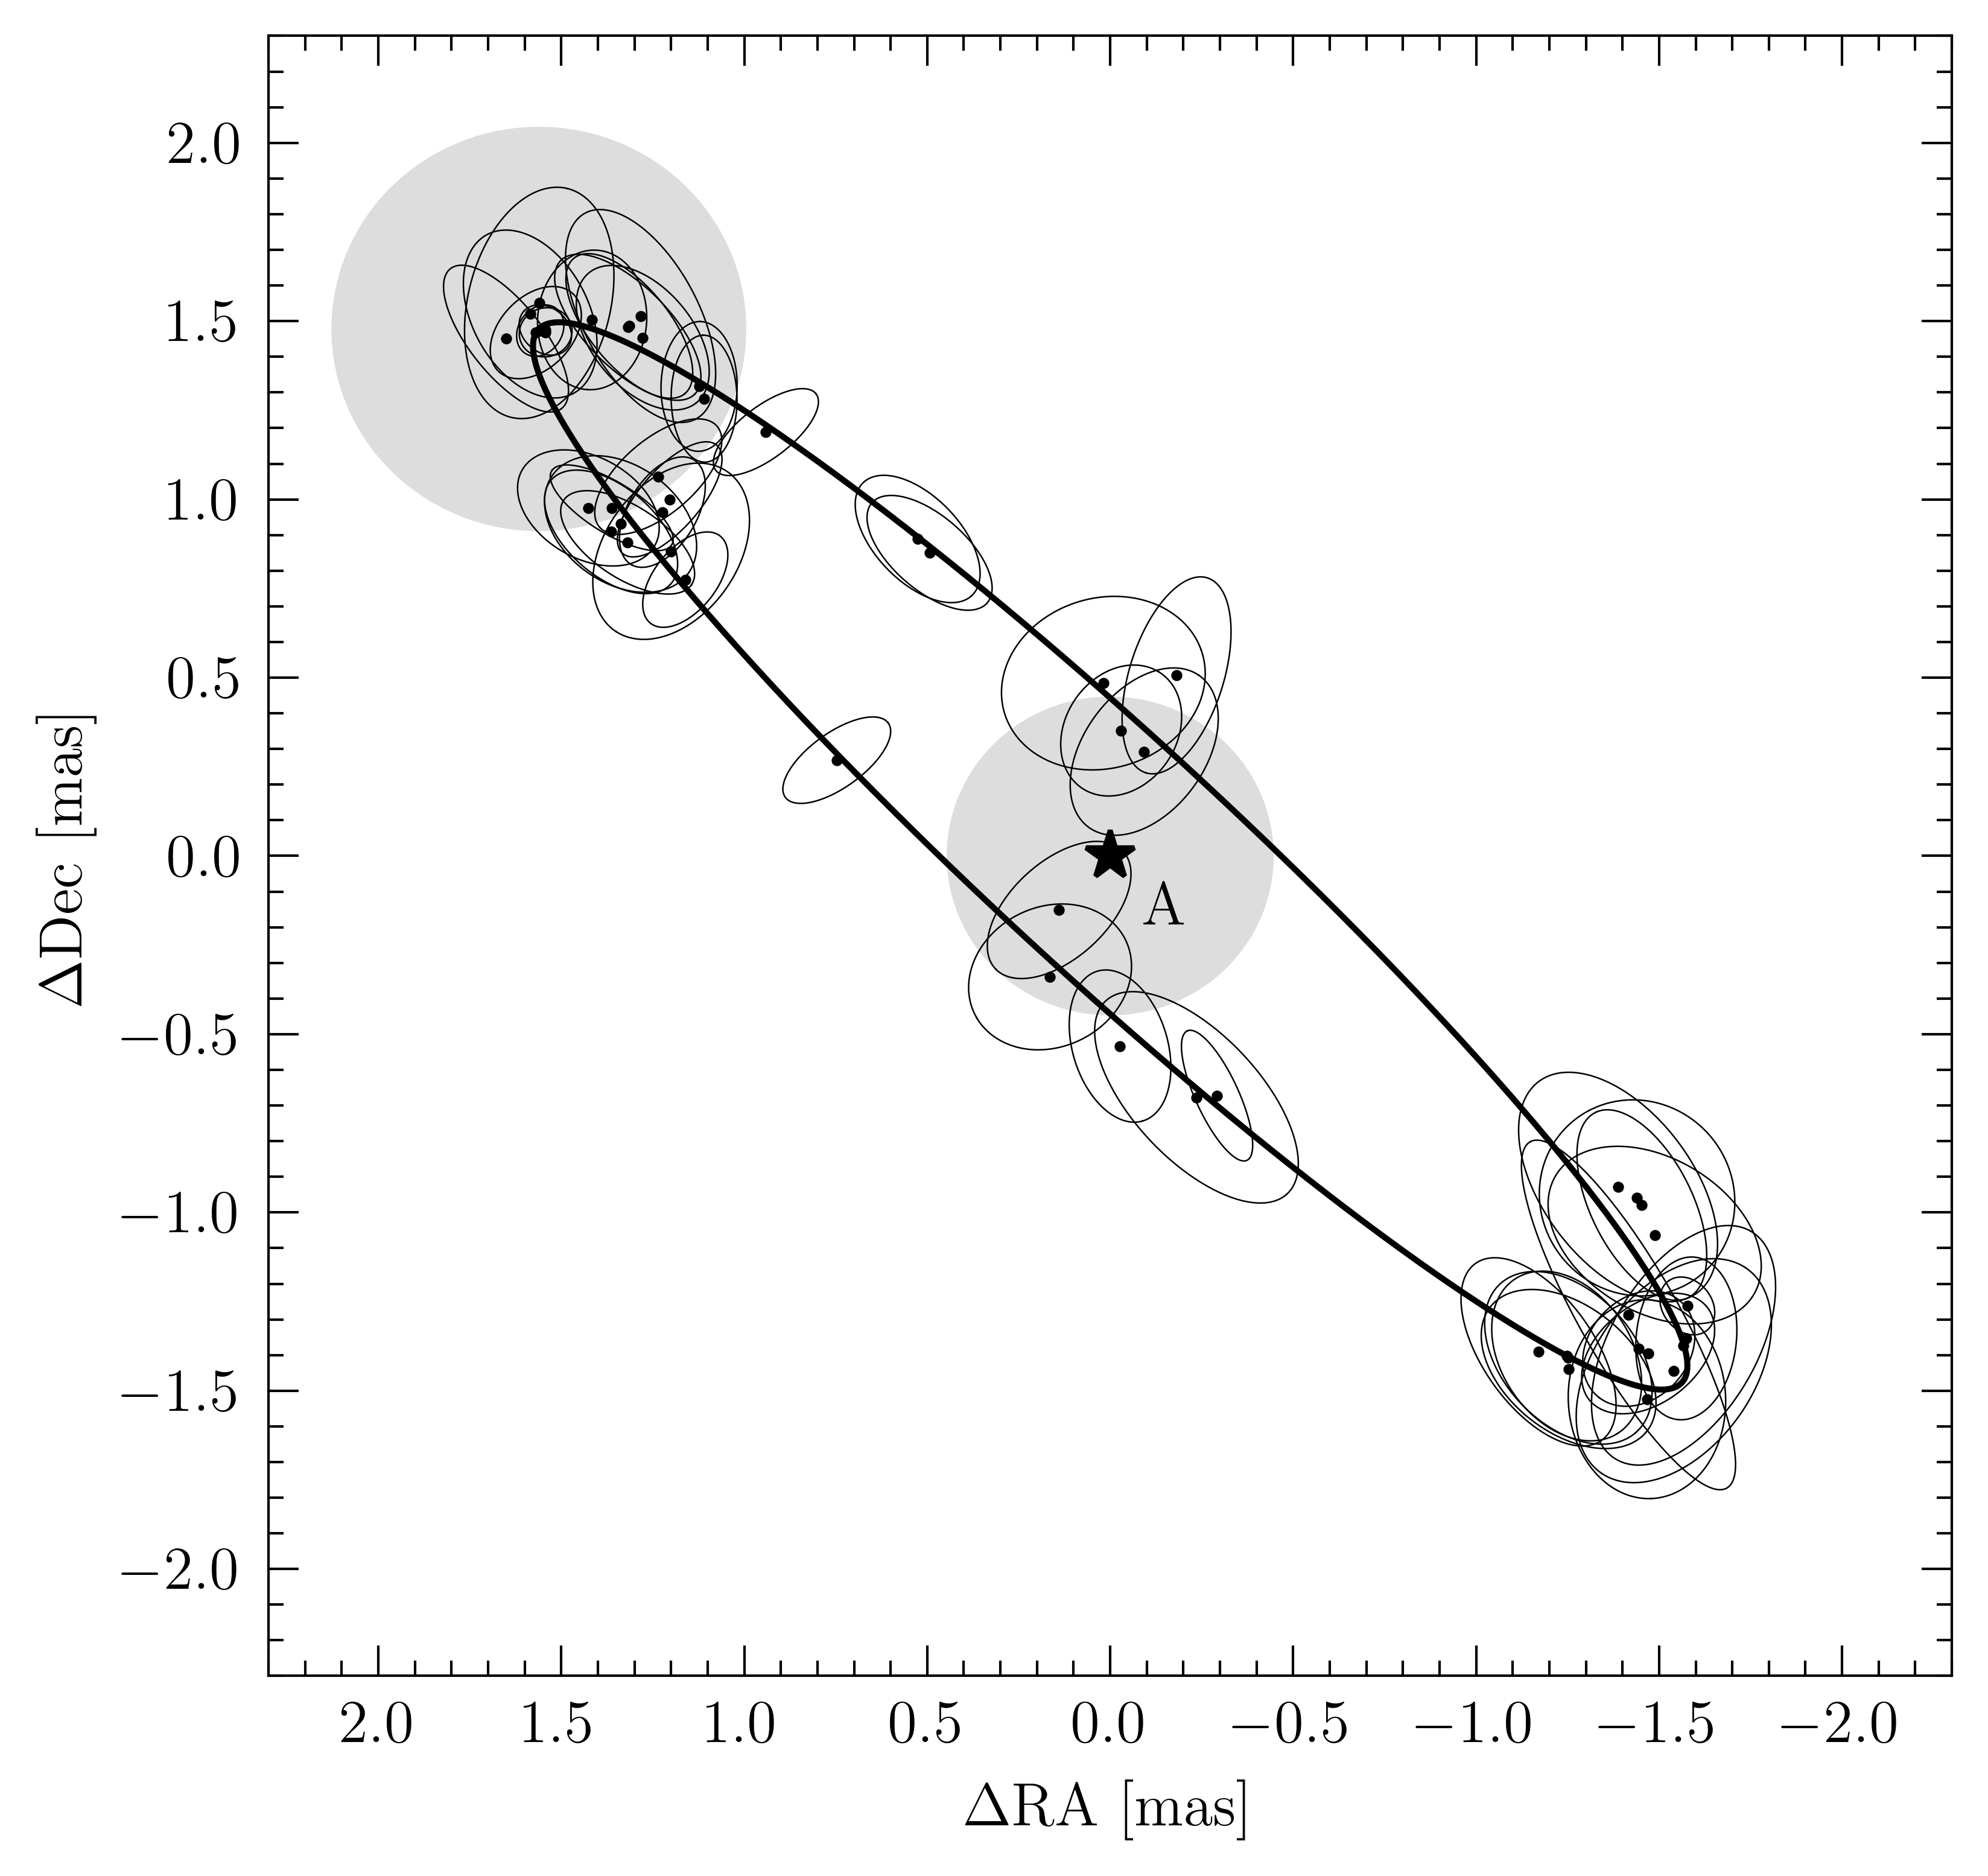

In [15]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

# do it

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top=True,right=True)
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top=True,right=True)

# do it

ax.set_xlim(skyMax,skyMin) # RA runs E-W
ax.set_xlabel(r'$\Delta$RA [mas]',fontsize=axisFontSize)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_ylim(skyMin,skyMax)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_ylabel(r'$\Delta$Dec [mas]',fontsize=axisFontSize)

# crosses at each point

ax.plot(dRA,dDec,'o',mfc='black',mec='black',ms=2,mew=0.2,zorder=8)

# error ellipses

for i in range(len(dRA)):
    plotEllipse(ax,dRA[i],dDec[i],sig_aB[i],sig_bB[i],psi_B[i],ecolor='black',fcolor=None,lw=0.3)

# Orbit ellipse
    
plotEllipse(ax,0.0,0.0,aB,bB,OmegaB,ecolor='black',fcolor=None,lw=1.2)

# Algol A

ax.plot(0.0,0.0,'*',ms=10,color='black',zorder=10)
ax.text(-0.15,-0.15,'A',va='center',ha='center',fontsize=axisFontSize,color='black',zorder=10)

# circles showing the angular diameters of Algol A and B, B at maximum angular separation

xB = aB*math.cos(math.radians(OmegaB))
yB = aB*math.sin(math.radians(OmegaB))

starColor = '#dddddd'
edgeColor = '#dddddd'
plotCircle(ax,0.0,0.0,0.5*phi_A,edgeColor,lw=0.3,fcolor=starColor)
plotCircle(ax,xB,yB,0.5*phi_B,edgeColor,lw=0.3,fcolor=starColor)

# make the PNG file

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')